In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

WARNING [__init__.py]: Environment variable PYMOTE_SETTINGS_MODULE is undefined, using global_settings.


C:\Users\Krepana Krava\Documents\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


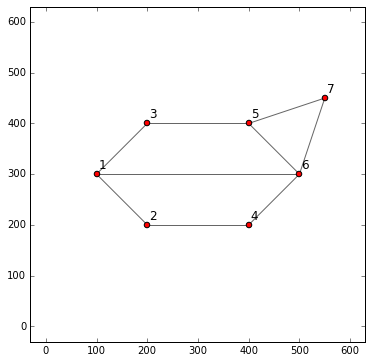

In [2]:
from pymote import Node
from pymote import Network

# Reseting numbering
Node.cid = 1

# Creating network
net = Network()

# Adding nodes
n1 = net.add_node(pos=(100, 300), commRange=0)
n2 = net.add_node(pos=(200, 200), commRange=0)
n3 = net.add_node(pos=(200, 400), commRange=0)
n4 = net.add_node(pos=(400, 200), commRange=0)
n5 = net.add_node(pos=(400, 400), commRange=0)
n6 = net.add_node(pos=(500, 300), commRange=0)
n7 = net.add_node(pos=(550, 450), commRange=0)

# Adding weighted edges
net.add_weighted_edges_from([
    (n1, n2, 10),
    (n1, n3, 1),
    (n2, n4, 2),
    (n3, n5, 3),
    (n1, n6, 5),
    (n4, n6, 8),
    (n5, n6, 3),
    (n5, n7, 5),
    (n6, n7, 3)
])

net.show()

In [5]:
from pymote import NetworkGenerator
from pymote import write_pickle
from pymote import Simulation
from pymote.bmo.algorithms.routing import PTConstruction

net.algorithms = (PTConstruction, )

write_pickle(net, "net.npc.gz")

sim = Simulation(net)
sim.run()

for n in net.nodes():
    print(n.id, n.status)

DEBUG   [simulation.py]: Simulation 0x3dec62c8L created successfully.


DEBUG:pymote.simulation:Simulation 0x3dec62c8L created successfully.


DEBUG   [simulation.py]: [PTConstruction] Step 1 finished


DEBUG:pymote.simulation:[PTConstruction] Step 1 finished


DEBUG   [simulation.py]: [PTConstruction] Step 2 finished


DEBUG:pymote.simulation:[PTConstruction] Step 2 finished


DEBUG   [simulation.py]: [PTConstruction] Algorithm finished


DEBUG:pymote.simulation:[PTConstruction] Algorithm finished


INFO    [simulation.py]: Simulation has finished. There are no algorithms left to run. To run it from the start use sim.reset().


INFO:pymote.simulation:Simulation has finished. There are no algorithms left to run. To run it from the start use sim.reset().


(1, 'INITIATOR')
(2, 'IDLE')
(3, 'IDLE')
(4, 'IDLE')
(5, 'IDLE')
(6, 'IDLE')
(7, 'IDLE')


In [6]:
print("Edges:")
for e in net.edges(data=True):
    print(e)
    
print("Nodes:")
for n in net.nodes():
    print(n.id, n.memory['weight'])

Edges:
(<Node id=3>, <Node id=1>, {'weight': 1})
(<Node id=3>, <Node id=5>, {'weight': 3})
(<Node id=4>, <Node id=2>, {'weight': 2})
(<Node id=4>, <Node id=6>, {'weight': 8})
(<Node id=1>, <Node id=2>, {'weight': 10})
(<Node id=1>, <Node id=6>, {'weight': 5})
(<Node id=5>, <Node id=7>, {'weight': 5})
(<Node id=5>, <Node id=6>, {'weight': 3})
(<Node id=7>, <Node id=6>, {'weight': 3})
Nodes:
(1, {<Node id=3>: 1, <Node id=2>: 10, <Node id=6>: 5})
(2, {<Node id=1>: 10, <Node id=4>: 2})
(3, {<Node id=1>: 1, <Node id=5>: 3})
(4, {<Node id=2>: 2, <Node id=6>: 8})
(5, {<Node id=3>: 3, <Node id=7>: 5, <Node id=6>: 3})
(6, {<Node id=1>: 5, <Node id=4>: 8, <Node id=7>: 3, <Node id=5>: 3})
(7, {<Node id=5>: 5, <Node id=6>: 3})
